# Рынок заведений общественного питания Москвы

## 1. Читаем и изучаем данные

Импортируем необходимые библиотеки

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

Читаем таблицу

In [2]:
places = pd.read_csv('data/moscow_places.csv')

Выводим 5 первых строк

In [3]:
places.head()

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats
0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",55.878494,37.478860,5.0,NaN,NaN,NaN,NaN,0,NaN
1,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",55.875801,37.484479,4.5,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN,0,4.0
2,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",55.889146,37.525901,4.6,средние,Средний счёт:от 1000 ₽,1000.0,NaN,0,45.0
3,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",55.881608,37.488860,5.0,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0,0,NaN
4,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",55.881166,37.449357,5.0,средние,Средний счёт:400–600 ₽,500.0,NaN,1,148.0


И выведем основную информацию о таблице

In [4]:
places.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               8406 non-null   object 
 1   category           8406 non-null   object 
 2   address            8406 non-null   object 
 3   district           8406 non-null   object 
 4   hours              7870 non-null   object 
 5   lat                8406 non-null   float64
 6   lng                8406 non-null   float64
 7   rating             8406 non-null   float64
 8   price              3315 non-null   object 
 9   avg_bill           3816 non-null   object 
 10  middle_avg_bill    3149 non-null   float64
 11  middle_coffee_cup  535 non-null    float64
 12  chain              8406 non-null   int64  
 13  seats              4795 non-null   float64
dtypes: float64(6), int64(1), object(7)
memory usage: 919.5+ KB


Посмотрим сколько уникальных заведений у нас есть

In [5]:
places['name'].nunique()

5614

Посмотрим количество заведений по катергориям

кафе               2378
ресторан           2043
кофейня            1413
бар,паб             765
пиццерия            633
быстрое питание     603
столовая            315
булочная            256
Name: category, dtype: int64

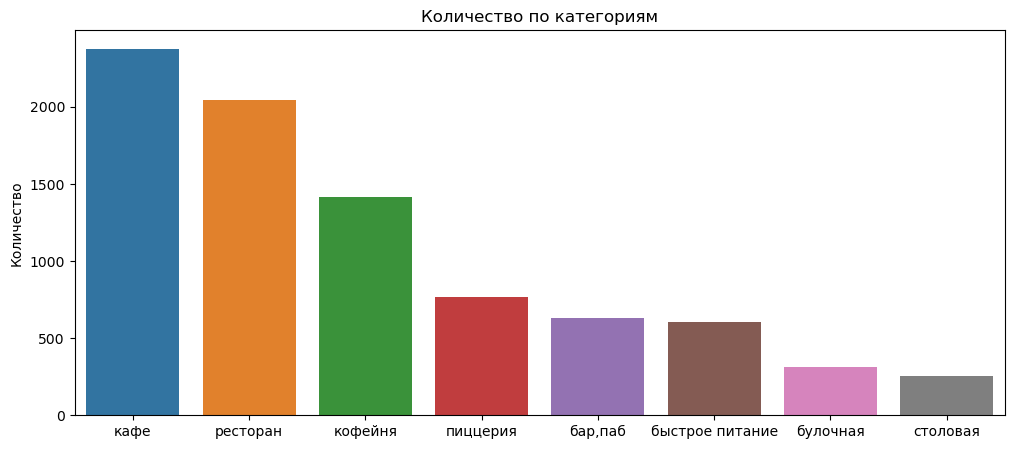

In [9]:
types = places['category'].unique()
fig, ax = plt.subplots(figsize=(12, 5))
sns.barplot(x = types, y = places['category'].value_counts()).set_title('Количество по категориям')
ax.set_ylabel('Количество')
places['category'].value_counts()

Видно что первое место занимает кафе, далее идут рестораны, а потом кофейни. Все остальные категории значительно меньше.

Также стоит посмотреть распределение заведений по районам

Центральный административный округ         2242
Северный административный округ             900
Южный административный округ                892
Северо-Восточный административный округ     891
Западный административный округ             851
Восточный административный округ            798
Юго-Восточный административный округ        714
Юго-Западный административный округ         709
Северо-Западный административный округ      409
Name: district, dtype: int64

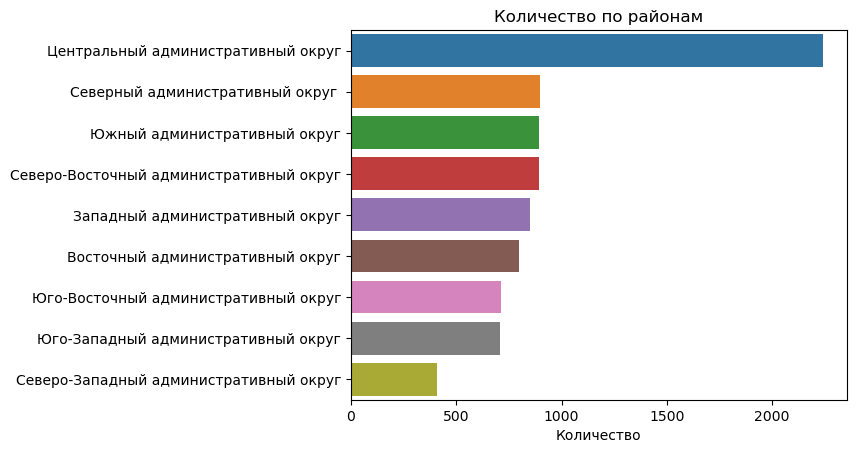

In [26]:
fig, ax = plt.subplots()

okr = ['Центральный административный округ',
       'Северный административный округ ',
       'Южный административный округ',
       'Северо-Восточный административный округ',
       'Западный административный округ',
       'Восточный административный округ',
       'Юго-Восточный административный округ',
       'Юго-Западный административный округ',
       'Северо-Западный административный округ']
sns.barplot(y = okr,x = places['district'].value_counts(), orient='h').set_title('Количество по районам')
ax.set_xlabel('Количество')
places['district'].value_counts()

Самое большое количество заведений находяться в ЦАО. Причем разрыв со вторым местом более чем в 2 раза. На кстати находится САО. ЮАО и СВАО находяться на 3 и 4 месте. И эти трое проктически равны по количеству заведений.

Количество сетевых заведений и не сетевых

0    5201
1    3205
Name: chain, dtype: int64

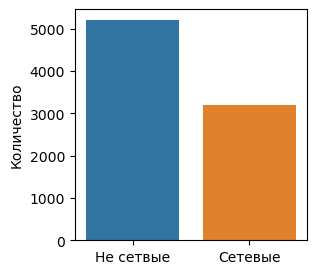

In [36]:
fig, ax = plt.subplots(figsize = (3,3))
sns.barplot(x = ['Не сетвые', 'Сетевые'],y = places['chain'].value_counts())
ax.set_ylabel('Количество')
places['chain'].value_counts()

Не сетевых сильно больше

средние          2117
выше среднего     564
высокие           478
низкие            156
Name: price, dtype: int64

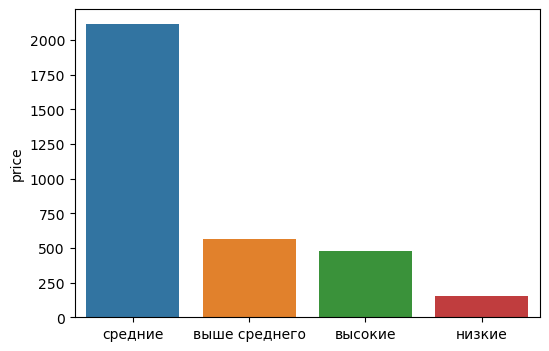

In [35]:
fig, ax = plt.subplots(figsize = (6,4))
poi = ['средние','выше среднего','высокие','низкие']
sns.barplot(x = poi,y = places['price'].value_counts())
places['price'].value_counts()

## 2. Предобработка данных